In [ ]:
import os, sys
import pandas as pd
from sklearn.manifold import MDS
from sklearn.cluster import KMeans

currentdir = os.getcwd()
parentdir = os.path.dirname(currentdir)
sys.path.append(parentdir)
# pd.set_option("display.notebook_repr_html", False)

from techminer import *

directory = "/workspaces/techminer-api/tests/data/"

def step_01():
    # Data importation
    import_scopus_file(directory=directory, scopus_file="scopus.csv")

def step_02():
    # Keywords coverage
    return column_coverage(directory, column="author_keywords")


def step_03():
    # ----< keywords search >----------------------------------------------------
    # clean_keywords(directory)
    print(find_string(directory, column="author_keywords", contains='innovation'))
    # print(stemming_and(directory, "raw_author_keywords", "electronic").drop_duplicates())
    pass    

def step_04():
    #
    # keywords cleaning + network clustering
    # --------------------------------------------------------
    clean_keywords(directory)
    coc_matrix = co_occurrence_matrix(
        directory, 
        'author_keywords',
        min_occ=9, 
        association="equivalence",
    )
    #
    mds = MDS(random_state=12345)
    #
    analyzer = co_occurrence_network_analysis(
        coc_matrix, 
        clustering_method='louvain', 
        manifold_method=mds,
    )

    return analyzer.communities()
    # return analyzer.network()
    # return analyzer.manifold_map()
    # print(analyzer.centrality_density_table())
    # return analyzer.centrality_density_map()
    

def step_05():
    #
    # keywords cleaning + matrix clustering
    # --------------------------------------------------------
    clean_keywords(directory)
    coc_matrix = co_occurrence_matrix(
        directory, 'author_keywords', 
        min_occ=9, 
        association="equivalence",
    )
    #
    kmeans=KMeans(n_clusters=5, random_state=1234)
    mds = MDS(random_state=12345)
    #
    analyzer = co_occurrence_matrix_analysis(
        coc_matrix, 
        clustering_method=kmeans, 
        manifold_method=mds
    )
    
    # print(analyzer.communities())
    # return analyzer.network()
    # return analyzer.manifold_map()
    # print(analyzer.centrality_density_table())
    # return analyzer.centrality_density_map()
    return analyzer.manifold_map()
    

def step_06():
    # ----< Main indicators >----------------------------------------------------
    # print(summary_view(directory))
    # return line_chart(annual_indicators()['num_documents'], title="Annual Scientific Production") 
    # return most_relevant_sources(directory)
    # return top_documents(directory)
    coc_matrix = co_occurrence_matrix(
        directory, 'author_keywords', 
        min_occ=9, 
        association="equivalence",
    )
    # return co_word_association_mds_map(coc_matrix)
    # return svd_co_occurrence_matrix_map(coc_matrix)
    # return svd_tf_idf_matrix_map(coc_matrix)
    # return abstract_screening(directory, text='fintech').head(10)
    # return abstract_concordances(directory, text='fintech').head(10)
    return abstract_summarization(directory, text='financial inclusion')
    pass

# step_01()

# print(summary_view(directory))

# coverage(directory)
bradford_zones(directory).tail()

# line_chart(annual_indicators()['num_documents'], title="Annual Scientific Production")
# bradford_plot().savefig("/workspaces/techminer-api/sphinx/images/bradford.png")
# annual_scientific_production().savefig("/workspaces/techminer-api/sphinx/images/annual_scientific_production.png")
# average_citations_per_year().savefig("/workspaces/techminer-api/sphinx/images/average_citations_per_year.png")
# most_relevant_sources().savefig("/workspaces/techminer-api/sphinx/images/most_relevant_sources.png")
# most_local_cited_sources()# .savefig("/workspaces/techminer-api/sphinx/images/most_local_cited_sources.png")

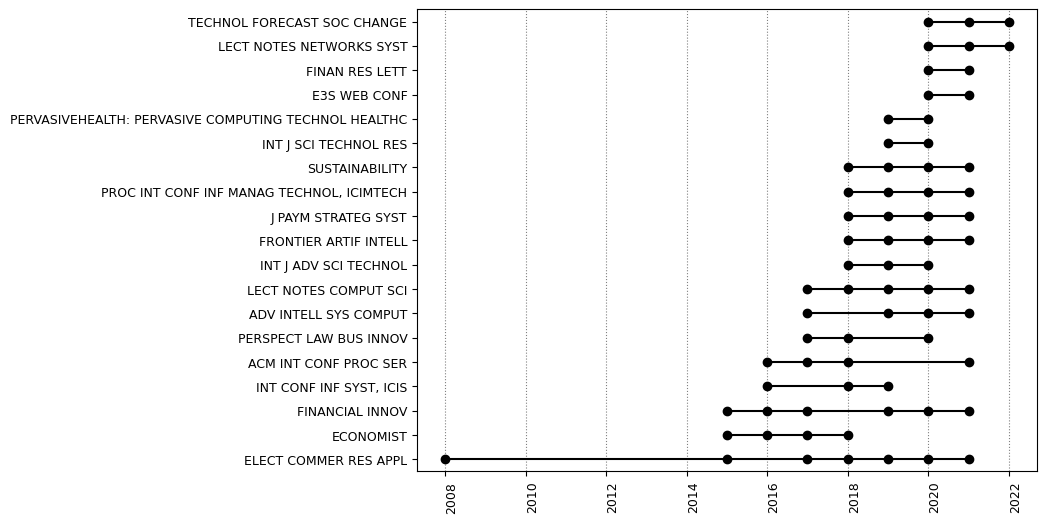

In [88]:
import os, sys
import pandas as pd
from sklearn.manifold import MDS
from sklearn.cluster import KMeans
import numpy as np
currentdir = os.getcwd()
parentdir = os.path.dirname(currentdir)
sys.path.append(parentdir)

import matplotlib.pyplot as plt
from techminer import annual_occurrence_matrix


from matplotlib.ticker import AutoMinorLocator
import matplotlib.ticker as plticker

def dotted_timeline_chart(annual_occurrence_matrix, color="grey", figsize=(8, 6)):

    data = annual_occurrence_matrix.copy()
    data = data.transpose()

    # ---------------------------------------------------------------------------
    sorted_data = annual_occurrence_matrix.copy()
    column = sorted_data.index.name
    sorted_data = sorted_data.reset_index()
    sorted_data = pd.melt(sorted_data, id_vars=column, var_name="year", value_name="occurrences")
    sorted_data["occurrences"] = sorted_data.occurrences.map(lambda x: np.nan if x == 0 else x)
    sorted_data = sorted_data.dropna()
    sorted_data = sorted_data.groupby(column).agg({"year": [np.max, np.min]})
    sorted_data.columns = sorted_data.columns.droplevel(0)
    sorted_data = sorted_data.rename(columns={"amax": "finish", "amin": "start"})
    sorted_data = sorted_data.sort_values(by=["start", "finish"])
    #
    data = data[sorted_data.index]
    # ---------------------------------------------------------------------------

    fig = plt.Figure(figsize=figsize)
    ax = fig.subplots()

    for i_column, column in enumerate(data.columns):
        values = data[column]
        values = values[values > 0]
        ax.plot(
            values.index.tolist(), 
            [i_column] * len(values),
            "o-k",
        )

    loc = plticker.MultipleLocator(base=1)
    
    ax.yaxis.set_major_locator(loc)
    ax.set_ylim(-0.5, len(data.columns) - 0.5)

    ax.set_yticklabels([""] + data.columns.tolist(), fontsize=9)
    
    for x in ["top", "right", "bottom"]:
        ax.spines[x].set_visible(False)    

    
    xticks = [str(int(x)) for x in ax.get_xticks()]
    ax.set_xticklabels(xticks, rotation=90, ha="left", fontsize=9)
        
    ax.grid(axis="x", color="gray", linestyle=":")
    

    return fig



directory = "/workspaces/techminer-api/tests/data/"
data = annual_occurrence_matrix(directory, 'iso_source_name',  min_occ=11)

dotted_timeline_chart(data)

In [ ]:
import pandas as pd

pd.read_csv("/workspaces/techminer-api/tests/data/documents.csv").wos_document_id[0]

In [ ]:
# user_filters(directory, erratum=False,  letter=False, first_year=2016, last_year=2020)
# user_filters(directory)
# annual_indicators()
# annual_scientific_production().plot()
# annual_scientific_production().table_
# apply_thesaurus(directory, thesaurus_file="keywords.txt", input_column="author_keywords", output_column="author_keywords_thesaurus", strict=False)
# auto_corr_heat_map(auto_corr_matrix(directory, column='authors', min_occ=4), cmap='Reds').savefig("/workspaces/techminer-api/sphinx/images/auto_corr_heat_map.png")
# auto_corr_map(auto_corr_matrix(directory, column='author_keywords', min_occ=20)).savefig('/workspaces/techminer-api/sphinx/images/auto_corr_map.png')
# auto_corr_map(auto_corr_matrix(directory, column='authors', min_occ=4), num_terms=10)
# auto_corr_matrix(directory, column='author_keywords', min_occ=18)
# auto_corr_matrix(directory, column='authors', min_occ=4)
# auto_corr_matrix(directory, column='authors', min_occ=6)
# bar_chart(series=annual_indicators(directory)['num_documents'], darkness=annual_indicators(directory)['global_citations']).savefig("/workspaces/techminer-api/sphinx/images/bar_chart.png")
# bradford_plot()
# bubble_chart(co_occurrence_matrix(directory, column='authors', min_occ=5))
# build_similarity_matrix_from_clusters(coc_matrix, clusters)
# clean_institutions(directory)
# clean_keywords(directory)
# clusters = similarity_matrix_clustering(coc_matrix)
# co_citation_network(directory, min_edges=4).plot( k=0.4, iterations=400).savefig('/workspaces/techminer-api/sphinx/images/co_citation_network.png')
# co_occurrence_heat_map(co_occurrence_matrix(directory, column='authors', min_occ=5), cmap='Reds').savefig("/workspaces/techminer-api/sphinx/images/co_occurrence_heat_map.png")
# co_occurrence_matrix(directory, 'authors', by='countries', min_occ=5, min_occ_by=8)
# co_occurrence_matrix(directory, 'authors', min_occ=5)
# co_occurrence_matrix(directory, column='authors', min_occ=5)
# co_occurrence_network_clusters(co_occurrence_matrix(directory, column='authors', min_occ=5))
# co_occurrence_network(co_occurrence_matrix(directory, 'author_keywords', min_occ=15), 'louvain').heat_map()
# co_occurrence_network(co_occurrence_matrix(directory, 'author_keywords', min_occ=15), 'louvain').heat_map().savefig('/workspaces/techminer-api/sphinx/images/co_occurrence_heat_map.png')
# co_occurrence_network(co_occurrence_matrix(directory, 'author_keywords', min_occ=15), 'louvain').node_degrees()
# co_occurrence_network(co_occurrence_matrix(directory, 'author_keywords', min_occ=15), 'louvain').node_degrees().savefig('/workspaces/techminer-api/sphinx/images/co_occurrence_degrees.png')
# co_occurrence_network(co_occurrence_matrix(directory, 'author_keywords', min_occ=15), 'louvain').plot()
# co_occurrence_network(co_occurrence_matrix(directory, 'author_keywords', min_occ=15), 'louvain').plot().savefig('/workspaces/techminer-api/sphinx/images/co_occurrence_network.png')
# co_occurrence_network(co_occurrence_matrix(directory, 'author_keywords', min_occ=15), 'louvain').table().head()
# co_word_association_mds_map(co_occurrence_matrix(directory, 'author_keywords', min_occ=15)).savefig('/workspaces/techminer-api/sphinx/images/co_word_association_mds_map.png')
# coc_matrix = co_occurrence_matrix(directory, column='authors', min_occ=5, association='jaccard')
# concept_mapping(co_occurrence_matrix(directory, 'author_keywords', min_occ=15), clustering_method=KMeans(n_clusters=6), manifold_method=MDS()).map().savefig("/workspaces/techminer-api/sphinx/images/concept_mapping.png")
# collaboration_indicators(directory, "countries").head()
# column_chart(series=annual_indicators(directory)['num_documents'], darkness=annual_indicators(directory)['global_citations']).savefig("/workspaces/techminer-api/sphinx/images/column_chart.png")
# column_chart(series=time_analysis(directory)['num_documents'], darkness=time_analysis(directory)['global_citations'])
# column_indicators()
# core_sources(directory)
# count_documents_by_term(directory, column='authors', min_occ=6)
# coverage()
# create_thesaurus(directory, column="keywords", thesaurus_file="test_thesaurus.txt", sep="; ")
# cross_corr_matrix(directory, column='authors', by='author_keywords', min_occ=5)
# cross_corr_matrix(directory, column='authors', min_occ=5, by='countries', min_occ_by=6)
# factor_cluster_map(centers, members)
# factor_heat_map(factor_matrix(co_occurrence_matrix(directory, column='authors', min_occ=6))).savefig("/workspaces/techminer-api/sphinx/images/factor_heat_map.png")
# factor_matrix(co_occurrence_matrix(directory, 'authors', min_occ=5))
# factor_matrix(co_occurrence_matrix(directory, column='authors', min_occ=6))
# factor_members_map(factor_matrix(co_occurrence_matrix(directory, column='authors', min_occ=6)), members)
# heat_map(co_occurrence_matrix(directory, 'authors', by='countries', min_occ=5, min_occ_by=8), cmap='Blues')
# heat_map(co_occurrence_matrix(directory, 'authors', by='countries', min_occ=5, min_occ_by=8), cmap='Blues').savefig("/workspaces/techminer-api/sphinx/images/co_occurrence_heat_map.png")
# heat_map(terms_per_year_analysis(directory, column='authors', metric='num_documents', min_occ=5), cmap='Reds')
# impact_analysis(directory, column="authors")
# impact_indicators(directory, "countries").head()
# import_scopus_file()
# lotka_plot()
# mainfold_factorial_analysis(co_occurrence_matrix(directory, 'author_keywords', min_occ=15), mainfold_method=MDS(), clustering_method=KMeans(n_clusters=4)).map()
# mainfold_factorial_analysis(co_occurrence_matrix(directory, 'author_keywords', min_occ=15), mainfold_method=MDS(), clustering_method=KMeans(n_clusters=4)).silhouette_scores_plot()
# mainfold_factorial_analysis(co_occurrence_matrix(directory, 'author_keywords', min_occ=15), mainfold_method=MDS(), clustering_method=KMeans(n_clusters=4)).words_by_cluster().head()
# mean_global_citations().plot().savefig('/workspaces/techminer-api/sphinx/images/mean_global_citations.png')
# mean_global_citations().table_
# members, centers = factor_clusters(factor_matrix(co_occurrence_matrix(directory, column='authors', min_occ=6)))
# most_relevant_sources().plot()
# most_relevant_sources().plot().savefig('/workspaces/techminer-api/sphinx/images/most_relevant_sources.png')
# most_relevant_sources().table_.head()
# pie_chart(series=annual_indicators(directory)['num_documents'], darkness=annual_indicators(directory)['global_citations']).savefig("/workspaces/techminer-api/sphinx/images/pie_chart.png")
# pie_chart(series=time_analysis(directory)['num_documents'], darkness=time_analysis(directory)['global_citations'])
# similarity_matrix_bubble_map(coc_matrix, clusters)
# slope_chart(co_occurrence_matrix(directory, column='authors', min_occ=5))
# summary()
# svd_co_occurrence_matrix_map(co_occurrence_matrix(directory, 'author_keywords', min_occ=15), dim_y=1).savefig('/workspaces/techminer-api/sphinx/images/svd_co_occurrence_matrix_map.png')
# svd_tf_idf_matrix_map(tf_idf_matrix(directory, 'author_keywords', min_occ=15)).savefig('/workspaces/techminer-api/sphinx/images/svd_tf_idf_matrix_map.png')
# terms_analysis(directory, column='authors', min_occ=5)
# terms_per_year_analysis(directory, column='authors', metric='num_documents', min_occ=5)
# tf_idf_matrix_mds_map(tf_idf_matrix(directory, 'author_keywords', min_occ=15)).savefig('/workspaces/techminer-api/sphinx/images/tf_idf_matrix_mds_map.png')
# thematic_map(directory, 'author_keywords', min_occ=13).map()
# time_analysis(directory)
# top_documents(directory)
# top_documents(directory)
# tree_map(series=annual_indicators(directory)['num_documents'], darkness=annual_indicators(directory)['global_citations']).savefig("/workspaces/techminer-api/sphinx/images/tree_map.png")
# tree_map(terms_analysis(directory, column='authors')['num_documents'].head(50), cmap='Reds')
# word_cloud(terms_analysis(directory, column='authors')['num_documents'].head(50), cmap='Reds')
# word_cloud(terms_report(directory, 'authors', min_occ=5).num_documents)
# world_map(directory, figsize=(8,7)).savefig('/workspaces/techminer-api/sphinx/images/world_map.png')
## ca_factorial_analysis(tf_matrix(directory, 'author_keywords', min_occ=14), clustering_method=KMeans(n_clusters=4)).silhouette_scores_plot()
# concept_mapping(co_occurrence_matrix(directory, 'author_keywords', min_occ=15), clustering_method=KMeans(n_clusters=6), manifold_method=MDS()).map().savefig("/workspaces/techminer-api/sphinx/images/concept_mapping_map.png")
# thematic_analysis(tf_idf_matrix(directory, 'author_keywords', min_occ=13), clustering_method=KMeans(n_clusters=6), manifold_method=MDS()).themes_by_words_
# thematic_analysis(tf_idf_matrix(directory, 'author_keywords', min_occ=13), clustering_method=KMeans(n_clusters=6), manifold_method=MDS()).decomposed_themes_by_words_
# thematic_analysis(tf_idf_matrix(directory, 'author_keywords', min_occ=13), clustering_method=KMeans(n_clusters=6), manifold_method=MDS()).map().savefig("/workspaces/techminer-api/sphinx/images/thematic_analysis-map.png")

# thematic_analysis(tf_idf_matrix(directory, 'author_keywords', min_occ=13), clustering_method=KMeans(n_clusters=6), manifold_method=MDS()).themes_by_words_
# thematic_analysis(tf_idf_matrix(directory, 'author_keywords', min_occ=13), clustering_method=KMeans(n_clusters=6), manifold_method=MDS()).decomposed_themes_by_words_
# thematic_analysis(tf_idf_matrix(directory, 'author_keywords', min_occ=13), clustering_method=KMeans(n_clusters=6), manifold_method=MDS()).map()

---